In [1]:
import numpy as np
import xarray as xr
from specutils.analysis import template_redshift
from specutils import Spectrum
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.nddata import StdDevUncertainty
from scipy.interpolate import interp1d

In [2]:
def radial_velocity_to_redshift(radial_velocity: float, speed_of_light: float) -> float:
    velocity_relative_to_light: float = radial_velocity / speed_of_light
    redshift: float = (
        np.sqrt((1 + velocity_relative_to_light) / (1 - velocity_relative_to_light)) - 1
    )
    return redshift

radial_velocities = []

for number in range(-100, 100, 1):
    radial_velocities.append(number)

shifts = []

for rv in radial_velocities:
    shifts.append(radial_velocity_to_redshift(rv, 2.998e5))

print(shifts)

[np.float64(-0.0003335000926496523), np.float64(-0.00033016564209187305), np.float64(-0.000326831180419096), np.float64(-0.0003234967076313211), np.float64(-0.00032016222372832637), np.float64(-0.0003168277287101118), np.float64(-0.0003134932225764553), np.float64(-0.0003101587053274679), np.float64(-0.0003068241769627056), np.float64(-0.00030348963748239033), np.float64(-0.0003001550868861891), np.float64(-0.00029682052517410185), np.float64(-0.0002934859523459066), np.float64(-0.0002901513684017143), np.float64(-0.0002868167733410809), np.float64(-0.00028348216716422847), np.float64(-0.0002801475498708239), np.float64(-0.0002768129214607562), np.float64(-0.00027347828193413637), np.float64(-0.0002701436312905203), np.float64(-0.00026680896953024114), np.float64(-0.00026347429665263267), np.float64(-0.000260139612658139), np.float64(-0.00025680491754620505), np.float64(-0.0002534702113169418), np.float64(-0.00025013549397023827), np.float64(-0.0002468007655058724), np.float64(-0.00024

In [ ]:
ds = xr.open_dataset("D:/Pavlicek, Emma/SDSS1411/SDSS1411_spectra.nc")

wavelength = ds.wavelength.values * u.AA

# Flux and uncertainty arrays
flux_array = ds.flux_calibrated.values * u.Unit('')  # shape (n_spectra, n_wavelengths)
flux_err_array = ds.flux_calibrated_error.values * u.Unit('')

time_seconds = ds.time.values
num_spectra = flux_array.shape[0]

# --- Build Spectrum objects with uncertainties ---
spectra = []
for i in range(num_spectra):
    spec = Spectrum(
        spectral_axis=wavelength,
        flux=flux_array[i, :],
        uncertainty=StdDevUncertainty(flux_err_array[i, :])  # keep errors for weighting
    )
    spectra.append(spec)


ds2 = xr.open_dataset("D:/Pavlicek, Emma/SDSS1411/blue.nc")

wavelength_blue = ds2.wavelength.values * u.AA

# Flux and uncertainty arrays
blue_flux_array = ds2.flux_calibrated.values * u.Unit('')  # shape (n_spectra, n_wavelengths)
blue_flux_err_array = ds2.flux_calibrated_error.values * u.Unit('')

blue_time_seconds = ds2.time.values
blue_num_spectra = blue_flux_array.shape[0]

# --- Build Spectrum objects with uncertainties ---
blue_spectra = []
for i in range(num_spectra):
    spec = Spectrum(
        spectral_axis=wavelength_blue,
        flux=blue_flux_array[i, :],
        uncertainty=StdDevUncertainty(blue_flux_err_array[i, :])  # keep errors for weighting
    )
    blue_spectra.append(spec)

ds3 = xr.open_dataset("D:/Pavlicek, Emma/SDSS1411/red.nc")

wavelength_red = ds3.wavelength.values * u.AA

# Flux and uncertainty arrays
red_flux_array = ds3.flux_calibrated.values * u.Unit('')  # shape (n_spectra, n_wavelengths)
red_flux_err_array = ds3.flux_calibrated_error.values * u.Unit('')

red_time_seconds = ds3.time.values
red_num_spectra = red_flux_array.shape[0]

# --- Build Spectrum objects with uncertainties ---
red_spectra = []
for i in range(num_spectra):
    spec = Spectrum(
        spectral_axis=wavelength_red,
        flux=red_flux_array[i, :],
        uncertainty=StdDevUncertainty(red_flux_err_array[i, :])  # keep errors for weighting
    )
    red_spectra.append(spec)


-5.6702862039181845e-05
4.717723086029339
[np.float64(4.974172426481652), np.float64(4.977704060583597), np.float64(4.983260598802753), np.float64(4.988899992618559), np.float64(4.994263413098221), np.float64(4.999540756585573), np.float64(5.004798003184914), np.float64(5.009632319732093), np.float64(5.013872557809356), np.float64(5.018280703345354), np.float64(5.021716477374294), np.float64(5.023424466211788), np.float64(5.024097507775254), np.float64(5.0235035573299625), np.float64(5.021360880778041), np.float64(5.017928135137711), np.float64(5.0131666682684095), np.float64(5.007141538814933), np.float64(4.999754811626526), np.float64(4.990131363563443), np.float64(4.978568775125094), np.float64(4.963826601711766), np.float64(4.949540788229393), np.float64(4.936892548726414), np.float64(4.925693026909572), np.float64(4.915918579406682), np.float64(4.906812765740422), np.float64(4.898966810979715), np.float64(4.892641277334306), np.float64(4.887578574209124), np.float64(4.883817785426

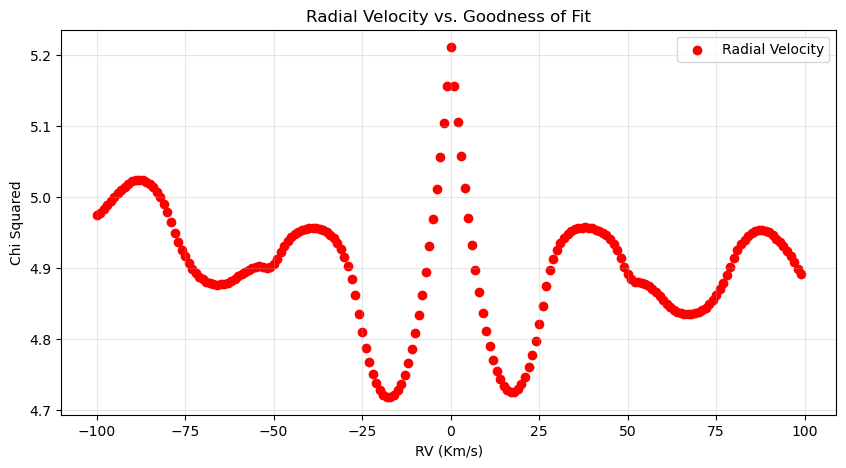

In [34]:
_, redshift, _, chi2_min, chi2_list = template_redshift(observed_spectrum=blue_spectra[0], template_spectrum=blue_spectra[3], redshift=shifts, resample_method='flux_conserving')
print(redshift)
print(chi2_min / len(wavelength_blue))
chi_sqs = []
for chi in chi2_list:
    nchi = chi / len(wavelength_blue)
    chi_sqs.append(nchi)
print(chi_sqs)

plt.figure(figsize=(10, 5))
plt.scatter(radial_velocities, chi_sqs, color="red", marker="o", label="Radial Velocity")
plt.xlabel("RV (Km/s)")
plt.ylabel("Chi Squared")
plt.title("Radial Velocity vs. Goodness of Fit")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [37]:
print(radial_velocities[np.argmin(chi_sqs)])



-17


In [ ]:
##This is what the source code is doing to normalize the templates, from what I can tell it doesnt normalize the reference
if stddev is None:
        stddev = observed_spectrum.uncertainty.represent_as(StdDevUncertainty).quantity

    num = np.nansum((observed_spectrum.flux*template_spectrum.flux) / (stddev**2))
    # We need to limit this sum to where observed_spectrum is not NaN as well.
    template_filtered = ((template_spectrum.flux / stddev)**2)
    template_filtered = template_filtered[np.where(~np.isnan(observed_spectrum.flux))]
    denom = np.nansum(template_filtered)



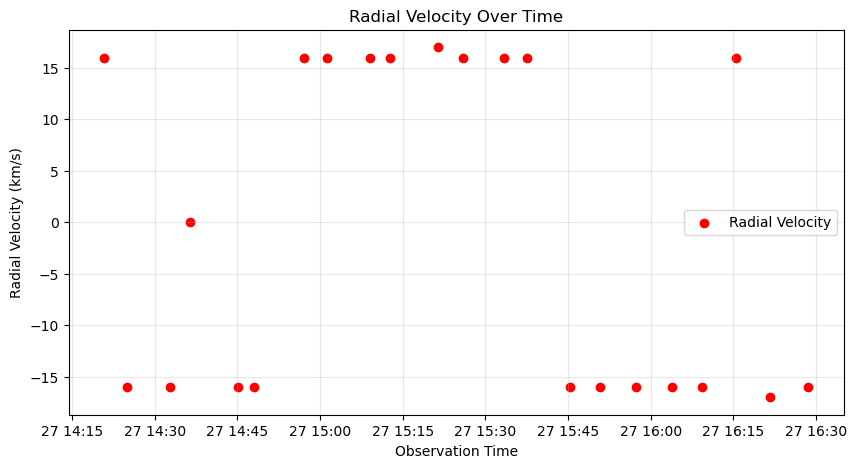

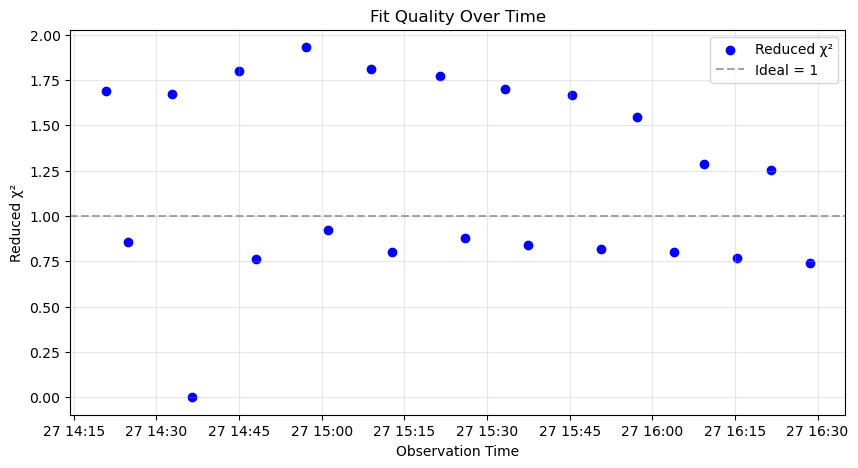

In [13]:
observed_spectrum = blue_spectra[3]

speed_of_light = 2.998e5  # km/s

found_shifts = []
reduced_chi2 = []
rvs = []

for spec in blue_spectra:
    _, redshift, _, chi2_min, _ = template_redshift(
        observed_spectrum=observed_spectrum,
        template_spectrum=spec,
        redshift=shifts,
        resample_method="flux_conserving"
    )
    found_shifts.append(redshift)
    reduced_chi2.append(chi2_min / len(wavelength))

    # Convert best-fit redshift → radial velocity
    rv = speed_of_light * (((1 + redshift)**2 - 1) / ((1 + redshift)**2 + 1))
    rvs.append(rv)

# --- Plot Radial Velocity over time ---
plt.figure(figsize=(10, 5))
plt.scatter(time_seconds, rvs, color="red", marker="o", label="Radial Velocity")
plt.xlabel("Observation Time")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Radial Velocity Over Time")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# --- Plot reduced chi² over time ---
plt.figure(figsize=(10, 5))
plt.scatter(time_seconds, reduced_chi2, color="blue", marker="o", label="Reduced χ²")
plt.axhline(1.0, color="gray", ls="--", alpha=0.7, label="Ideal = 1")
plt.xlabel("Observation Time")
plt.ylabel("Reduced χ²")
plt.title("Fit Quality Over Time")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

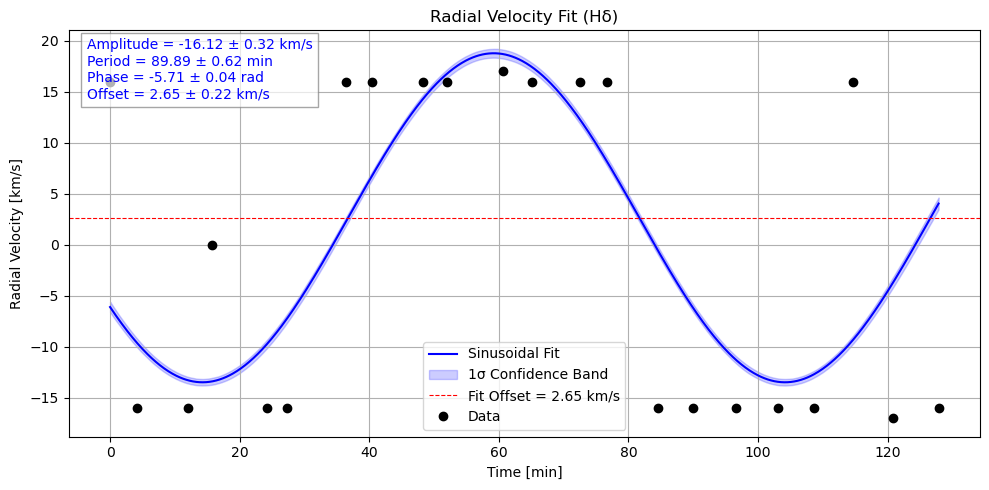

In [28]:
###FIT LEVEL 2###
# --- Data extraction ---
v = rvs
v_err = None
time = blue_time_seconds
 

# Convert time to minutes since first observation
time0 = time[0]
time = (time - time0) / np.timedelta64(1, 'm')  # now in minutes

time_odd = time[1::2]
v_odd = v[1::2]
v_err_odd = None

# Define sinusoid model: v(t) = A * sin(2π f t + phi) + C
def sinusoid(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

# Initial guess
A_guess = (np.nanmax(v) - np.nanmin(v)) / 2
f_guess = 1 / 6960  # one full cycle
phi_guess = 0
C_guess = np.mean(v)

p0 = [A_guess, f_guess, phi_guess, C_guess]

# Fit to raw velocities
popt, pcov = curve_fit(sinusoid, time, v, sigma=v_err, absolute_sigma=True, p0=p0)
A_fit, f_fit, phi_fit, C_fit = popt
perr = np.sqrt(np.diag(pcov))
A_err, f_err, phi_err, C_err = perr

# Compute best-fit curve
time_fit = np.linspace(time.min(), time.max(), 1000)
v_fit = sinusoid(time_fit, *popt)

# Monte Carlo uncertainty band
n_samples = 1000
samples = np.random.multivariate_normal(popt, pcov, size=n_samples)
v_samples = np.array([sinusoid(time_fit, *s) for s in samples])
v_lower = np.percentile(v_samples, 16, axis=0)
v_upper = np.percentile(v_samples, 84, axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.errorbar(time, v, yerr=v_err, fmt='o', color='black', ecolor='gray', capsize=3, label='Data')
plt.plot(time_fit, v_fit, color='blue', label='Sinusoidal Fit')
plt.fill_between(time_fit, v_lower, v_upper, color='blue', alpha=0.2, label='1σ Confidence Band')
plt.title("Radial Velocity Fit (Hδ)")
plt.xlabel("Time [min]")
plt.ylabel("Radial Velocity [km/s]")
plt.axhline(C_fit, color='red', linestyle='--', linewidth=0.8, label=f'Fit Offset = {C_fit:.2f} km/s')
plt.legend()
plt.grid(True)

# Add fit parameters to plot
fit_label = (
    f"Amplitude = {A_fit:.2f} ± {A_err:.2f} km/s\n"
    f"Period = {1/f_fit:.2f} ± {(f_err / f_fit**2):.2f} min\n"
    f"Phase = {phi_fit:.2f} ± {phi_err:.2f} rad\n"
    f"Offset = {C_fit:.2f} ± {C_err:.2f} km/s"
)
plt.text(0.02, 0.98, fit_label, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', color='blue',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.tight_layout()
plt.show()

In [57]:
def _normalize_for_template_matching(observed_spectrum: Spectrum,
                                     template_spectrum: Spectrum,
                                     stddev=None) -> float:
    """
    Calculate the scale factor to apply to the template spectrum so that
    the total flux matches the observed spectrum (weighted by uncertainties).
    """
    if stddev is None:
        stddev = observed_spectrum.uncertainty.represent_as(StdDevUncertainty).quantity
    
    num = np.nansum((observed_spectrum.flux * template_spectrum.flux) / (stddev**2))
    
    # mask out where observed_spectrum is NaN
    template_filtered = (template_spectrum.flux / stddev)**2
    mask = ~np.isnan(observed_spectrum.flux)
    denom = np.nansum(template_filtered[mask])
    
    return (num / denom).value  # return float, not Quantity

def plot_spectra_with_residuals(reference: Spectrum,
                                template: Spectrum,
                                rv_shift: float = 0.0,
                                title: str = "Reference vs Template + Residuals",
                                normalize: bool = True):
    """
    Plot reference spectrum and template spectrum shifted by RV,
    plus residuals (ref - temp) / uncertainty.
    
    Parameters
    ----------
    reference : Spectrum1D
        Reference spectrum (must include uncertainty).
    template : Spectrum1D
        Template spectrum.
    rv_shift : float
        Radial velocity shift in km/s to apply to the template.
    title : str
        Title for the plot.
    normalize : bool, optional
        If True, scale the template flux using specutils-style normalization.
    """
    
    # --- Extract arrays ---
    ref_wave = reference.spectral_axis.to("Angstrom").value
    ref_flux = reference.flux.value
    ref_unc  = reference.uncertainty.array if reference.uncertainty is not None else np.ones_like(ref_flux)
    
    temp_wave = template.spectral_axis.to("Angstrom").value
    temp_flux = template.flux.value
    
    # --- Convert RV to redshift ---
    z = radial_velocity_to_redshift(rv_shift, 2.998e5)
    
    # --- Shift template wavelength grid ---
    shifted_wave = temp_wave * (1 + z)
    
    # --- Interpolate template onto reference grid ---
    interp_func = interp1d(shifted_wave, temp_flux,
                           kind="linear", bounds_error=False, fill_value=np.nan)
    interp_temp = interp_func(ref_wave)
    
    # --- Build Spectrum1D for normalization ---
    interp_template_spec = Spectrum(spectral_axis=reference.spectral_axis,
                                      flux=interp_temp * reference.flux.unit)
    
    # --- Normalize template if requested ---
    if normalize:
        scale = _normalize_for_template_matching(reference, interp_template_spec)
        interp_temp *= scale
    
    # --- Residuals ---
    residuals = (ref_flux - interp_temp) / ref_unc
    
    # --- Chi-square ---
    mask = np.isfinite(residuals)
    chi2 = np.sum(residuals[mask]**2)
    dof = np.sum(mask) - (2 if normalize else 1)  # subtract fitted params: RV (+scale)
    red_chi2 = chi2 / dof if dof > 0 else np.nan
    
    # --- Plot ---
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True,
                             gridspec_kw={'height_ratios':[3,1]})
    
    # Top panel: spectra
    axes[0].plot(ref_wave, ref_flux, label="Reference", color="k")
    axes[0].plot(ref_wave, interp_temp, label=f"Template (rv={rv_shift:.1f} km/s)", color="C1", alpha=0.7)
    axes[0].set_ylabel("Flux")
    axes[0].legend()
    axes[0].set_title(title + f"\nReduced χ² = {red_chi2:.2f}")
    
    # Bottom panel: residuals
    axes[1].plot(ref_wave, residuals, color="gray")
    axes[1].axhline(0, color="k", linestyle="--")
    axes[1].set_xlabel("Wavelength [Å]")
    axes[1].set_ylabel("(Ref - Temp)/σ")
    
    plt.tight_layout()
    plt.show()
    
    return red_chi2

In [ ]:
from specutils.analysis import template_redshift

def plot_spectra_with_template_redshift(reference: Spectrum,
                                template: Spectrum,
                                rv_shift: float = 0.0,
                                title: str = "Reference vs Template + Residuals",
                                normalize: bool = True):
    """
    Plot reference spectrum and template spectrum shifted by RV,
    plus residuals (ref - temp) / uncertainty.
    
    Parameters
    ----------
    reference : Spectrum1D
        Reference spectrum (must include uncertainty).
    template : Spectrum1D
        Template spectrum.
    rv_shift : float
        Radial velocity shift in km/s to apply to the template.
    title : str
        Title for the plot.
    normalize : bool, optional
        If True, scale the template flux using specutils-style normalization.
    """
    
    # --- Convert RV to redshift ---
    z = radial_velocity_to_redshift(rv_shift, 2.998e5)
    
    # --- Use template_redshift for normalization ---
    redshifted_template, final_redshift, normalized_template, chi2_min, chi2_list = \
        template_redshift(reference, template, redshift=z, resample_method='flux_conserving', extrapolation_treatment='truncate')
    
    # --- Extract arrays ---
    ref_wave = reference.spectral_axis.to("Angstrom").value
    ref_flux = reference.flux.value
    ref_unc  = reference.uncertainty.array if reference.uncertainty is not None else np.ones_like(ref_flux)
    
    temp_wave = redshifted_template.spectral_axis.to("Angstrom").value
    temp_flux = normalized_template.flux.value
    
    # --- Interpolate normalized template onto reference grid ---
    interp_func = interp1d(temp_wave, temp_flux,
                           kind="linear", bounds_error=False, fill_value=np.nan)
    interp_temp = interp_func(ref_wave)
    
    # --- Residuals ---
    residuals = (ref_flux - interp_temp) / ref_unc
    
    # --- Chi-square ---
    mask = np.isfinite(residuals)
    chi2 = np.sum(residuals[mask]**2)
    dof = np.sum(mask) - 1  # subtract 1 for the fitted parameter (RV)
    r_chi2 = chi2 / dof if dof > 0 else np.nan
    
    # --- Plot ---
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True,
                             gridspec_kw={'height_ratios':[3,1]})
    
    # Top panel: spectra
    axes[0].plot(ref_wave, ref_flux, label="Reference", color="k")
    axes[0].plot(ref_wave, interp_temp, label=f"Template (rv={rv_shift:.1f} km/s)", color="C1", alpha=0.7)
    axes[0].set_ylabel("Flux")
    axes[0].legend()
    axes[0].set_title(title + f"\nReduced χ² = {r_chi2:.2f}")
    
    # Bottom panel: residuals
    axes[1].plot(ref_wave, residuals, color="gray")
    axes[1].axhline(0, color="k", linestyle="--")
    axes[1].set_xlabel("Wavelength [Å]")
    axes[1].set_ylabel("(Ref - Temp)/σ")
    
    plt.tight_layout()
    plt.show()
    
    return r_chi2


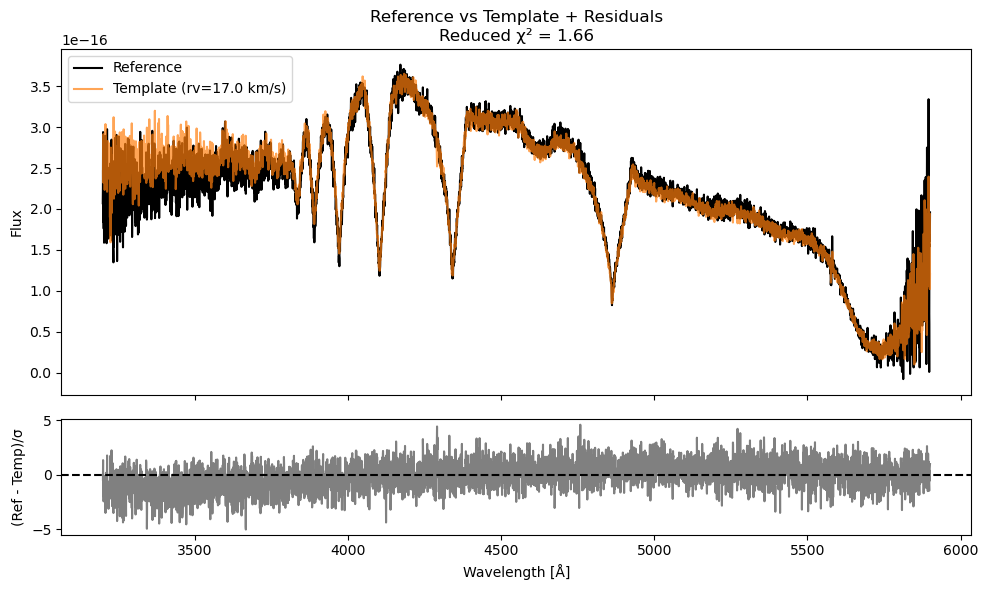

In [ ]:
spectrum1 = spectra[3]
spectrum2 = spectra[11]

#red_chi2 = plot_spectra_with_residuals(spectrum1, spectrum2, rv_shift=30.0)

r_chi2 = plot_spectra_with_template_redshift(spectrum1, spectrum2, rv_shift=17.0)

In [64]:
def overplot_template_with_residuals(reference: Spectrum,
                                     template: Spectrum,
                                     rv_shift: float = 0.0,
                                     title: str = "Reference vs Template + Residuals"):
    """
    Overplot a reference spectrum and a template spectrum shifted and normalized
    using specutils.template_redshift, with a residuals panel below.

    Parameters
    ----------
    reference : Spectrum1D
        Observed reference spectrum (should have uncertainty for residuals).
    template : Spectrum1D
        Template spectrum.
    rv_shift : float
        Radial velocity shift in km/s.
    title : str
        Plot title.
    """
    c = 299792.458  # km/s

    # Relativistic redshift
    z = ( (1 + rv_shift/c)**0.5 / (1 - rv_shift/c)**0.5 ) - 1

    # Redshift + normalize template using specutils
    shifted_template, final_redshift, normalized_template, chi2_min, chi2_list = \
        template_redshift(reference, template, redshift=z,
                          resample_method='flux_conserving',
                          extrapolation_treatment='truncate')

    # Wavelength & flux arrays
    ref_wave = reference.spectral_axis
    ref_flux = reference.flux
    ref_unc  = reference.uncertainty.array if reference.uncertainty is not None else np.ones_like(ref_flux)

    temp_wave = normalized_template.spectral_axis
    temp_flux = normalized_template.flux

    # Interpolate normalized template onto reference wavelength grid for residuals
    interp_flux = np.interp(ref_wave.value, temp_wave.value, temp_flux.value)

    # Residuals
    residuals = (ref_flux.value - interp_flux) / ref_unc

    # Reduced chi-square
    mask = np.isfinite(residuals)
    chi2 = np.sum(residuals[mask]**2)
    dof = np.sum(mask) - 1  # RV is the single fitted parameter
    rd_chi2 = chi2 / dof if dof > 0 else np.nan

    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True,
                             gridspec_kw={'height_ratios':[3,1]})

    # Top: spectra
    axes[0].plot(ref_wave, ref_flux, label="Reference", color="k")
    axes[0].plot(temp_wave, temp_flux, label=f"Template (rv={rv_shift:.1f} km/s)", color="C1", alpha=0.7)
    axes[0].set_ylabel("Flux")
    axes[0].legend()
    axes[0].set_title(f"{title}\nReduced χ² = {rd_chi2:.2f}")

    # Bottom: residuals
    axes[1].plot(ref_wave, residuals, color="gray")
    axes[1].axhline(0, color="k", linestyle="--")
    axes[1].set_xlabel("Wavelength")
    axes[1].set_ylabel("(Ref - Temp)/σ")

    plt.tight_layout()
    plt.show()

    return rd_chi2


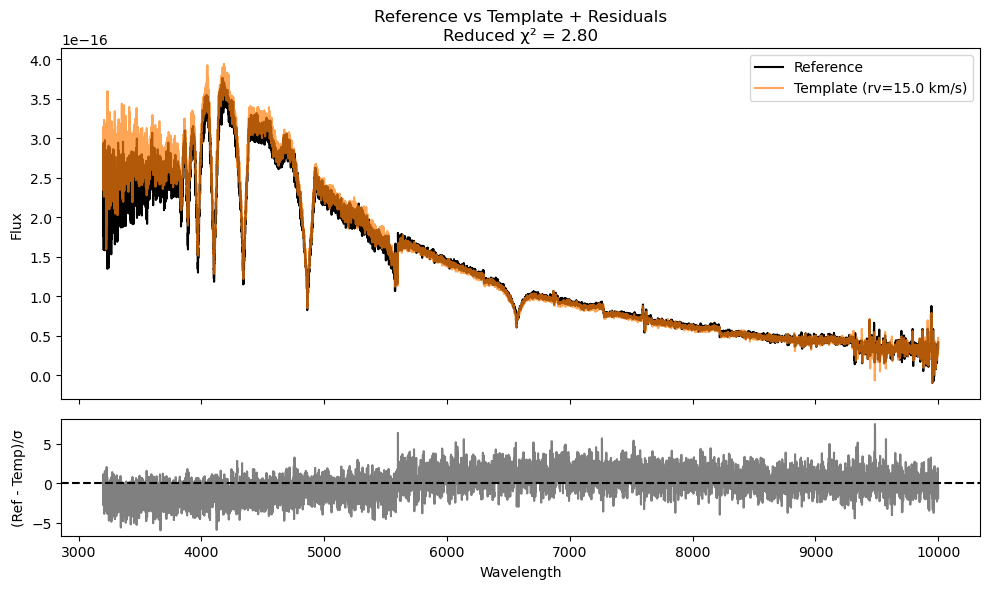

In [65]:
rd_chi2 = overplot_template_with_residuals(spectrum1, spectrum2, rv_shift=15.0)